<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/SandfordHydro_Daily_Generation_Preprocessing_Ravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sandford Hydro Daily Generation Data Processing 

Author: Ravi Kohli

Date: November 17th, 2020

College: Christ Church

**Purpose:** This notebook will:
- process the daily Sandford Generation data such that it can be used to do analysis in another notebook

The dataset has three main columns:
- Reading date
- Incremental Reading: the generation on that specific day
- Meter Reading: a running total

**NOTE:** if running this notebook on your own computer, then just ignore this cell below

In [1]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

Now we need to retrieve the following datasets:
- Oxford precipitation data
- Sandford generation data

In [3]:
# Retrieving the precipitation data
sandford_path = '/content/drive/My Drive/3YP/data/'     # when running in a notebook in colab
#path = '../data/'                                      # when running from an external notebook

filename = "Sandford_generation_daily.csv"              # the name of the csv file
sandford_df = pd.read_csv(sandford_path+filename)       # converting the csv file to a dataframe

In [4]:
sandford_df.head(40)                                    # just to look at the data

,Reading Date,Incremental Reading,Meter Reading
0,22/10/2019 00:00,"1,284.10","1,763,145.53"
1,21/10/2019 00:00,"1,175.01","1,761,861.43"
2,20/10/2019 00:00,"1,175.01",NaN
3,19/10/2019 00:00,"1,175.01",NaN
4,18/10/2019 00:00,"2,265.09","1,758,336.41"
5,17/10/2019 00:00,"3,438.12","1,756,071.32"
6,16/10/2019 00:00,"3,438.11",NaN
7,15/10/2019 00:00,"3,438.11",NaN
8,14/10/2019 00:00,"5,758.16","1,745,756.98"
9,13/10/2019 00:00,"5,758.16",NaN


In [5]:
# initial overview of the dataframe
sandford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Reading Date         369 non-null    object
 1   Incremental Reading  369 non-null    object
 2   Meter Reading        320 non-null    object
dtypes: object(3)
memory usage: 8.8+ KB


**Having looked through the data, we require the following pre-processing steps:**
- Datatypes: need to be changed from non-null to datetime and float
  - The order of the dates is DD / MM / YYYY in the string and thus needs to be taken into account when using `pd.to_datetime`
  - The dates need to be changed from timestamps to datetime
  - The strings of the readings in the 'Incremental Readings' and 'Meter Readings' columns have commas ',' in them which need to be removed to allow conversion of data to floats
- Missing data: can either be exluded or interpolated


In [6]:
# changing the datatype of the 'Reading Date' column to datetime
sandford_df['Reading Date'] =  pd.to_datetime(sandford_df['Reading Date'], dayfirst = True)     # the data has the date first in the string

In [7]:
#sandford_df['NEWDATE'] = sandford_df['Reading Date'].apply(lambda x: str(x.day)+'/'+str(x.month)+'/'+str(x.year)).  # spare lambda function to deal with dates
sandford_df

,Reading Date,Incremental Reading,Meter Reading
0,2019-10-22,"1,284.10","1,763,145.53"
1,2019-10-21,"1,175.01","1,761,861.43"
2,2019-10-20,"1,175.01",NaN
3,2019-10-19,"1,175.01",NaN
4,2019-10-18,"2,265.09","1,758,336.41"
...,...,...,...
364,2018-10-22,0,"548,149.91"
365,2018-10-21,0,"548,149.91"
366,2018-10-20,0,"548,149.91"
367,2018-10-19,0,"548,149.91"


In [8]:
# removing the commas from the reading data so we can convert them into floats
sandford_df['Incremental Reading'] = sandford_df['Incremental Reading'].str.replace(',', '').astype(float)
sandford_df['Meter Reading'] = sandford_df['Meter Reading'].str.replace(',', '').astype(float)

In [9]:
# changing the other data types to floats
sandford_df[sandford_df.columns[1: ]] = sandford_df[sandford_df.columns[1: ]].apply(pd.to_numeric)

In [10]:
sandford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reading Date         369 non-null    datetime64[ns]
 1   Incremental Reading  369 non-null    float64       
 2   Meter Reading        320 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.8 KB


Now let us get an initial plot to see what the data looks like

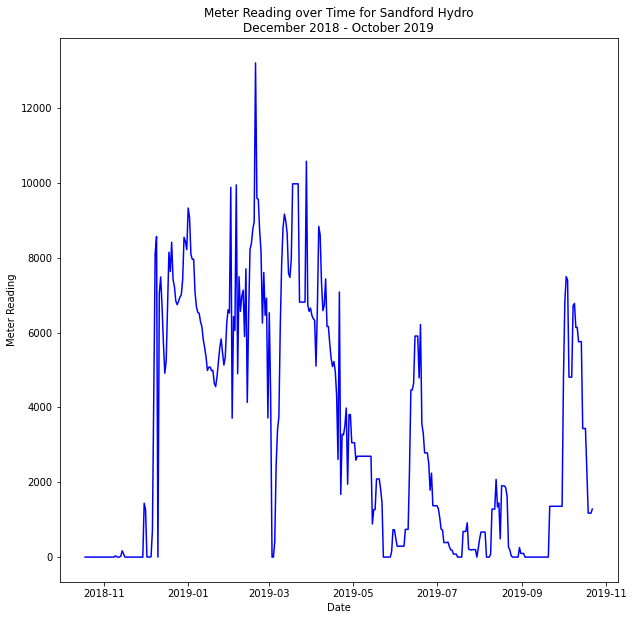

In [11]:
s_fig, s_ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
s_ax.plot(sandford_df['Reading Date'], sandford_df['Incremental Reading'], color='blue')

# Set title and labels for axes
s_ax.set(xlabel="Date",
       ylabel="Meter Reading",
       title="Meter Reading over Time for Sandford Hydro\nDecember 2018 - October 2019")

# Change the date format if we want
#x_dates = pd.to_datetime(sandford_df['Reading Date']).dt.strftime('%m-%y')#.sort_values()#.unique()
#s_ax.xaxis.set_major_formatter(plt.FixedFormatter(x_dates))
#s_ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.show()